## Undestading The Data And Making the comfortable diectories

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Initial_data/labels.csv')

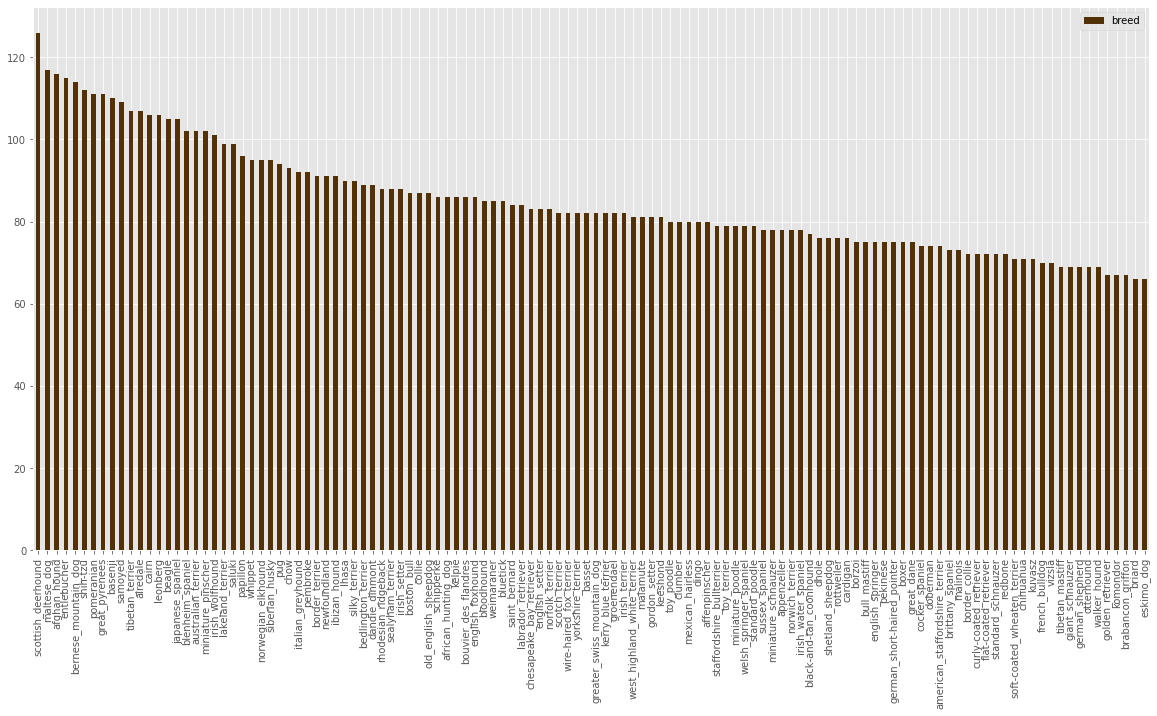

In [7]:
## Checking the Distribution in original dataset
plt.style.use('ggplot')
data.breed.value_counts().plot(kind = 'bar',figsize = (20,10),fontsize = 10,legend = True, cmap = 'BrBG')
plt.show()

In [8]:
data.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

## Selecting only 10 breeds as specified in assignment

In [10]:
# making a list of species required to be used as classes in assignment

required = ["beagle", "chihuahua", "doberman",
            "french_bulldog", "golden_retriever", 
            "malamute", "pug", 'saint_bernard', 
            "scottish_deerhound","tibetan_mastiff"]
display(required )

['beagle',
 'chihuahua',
 'doberman',
 'french_bulldog',
 'golden_retriever',
 'malamute',
 'pug',
 'saint_bernard',
 'scottish_deerhound',
 'tibetan_mastiff']

## Plotting the distribution of these 10 breeds in dataset

In [11]:
new_data = pd.DataFrame()
for i in required:
    new_data = new_data.append(data[data.breed == i])

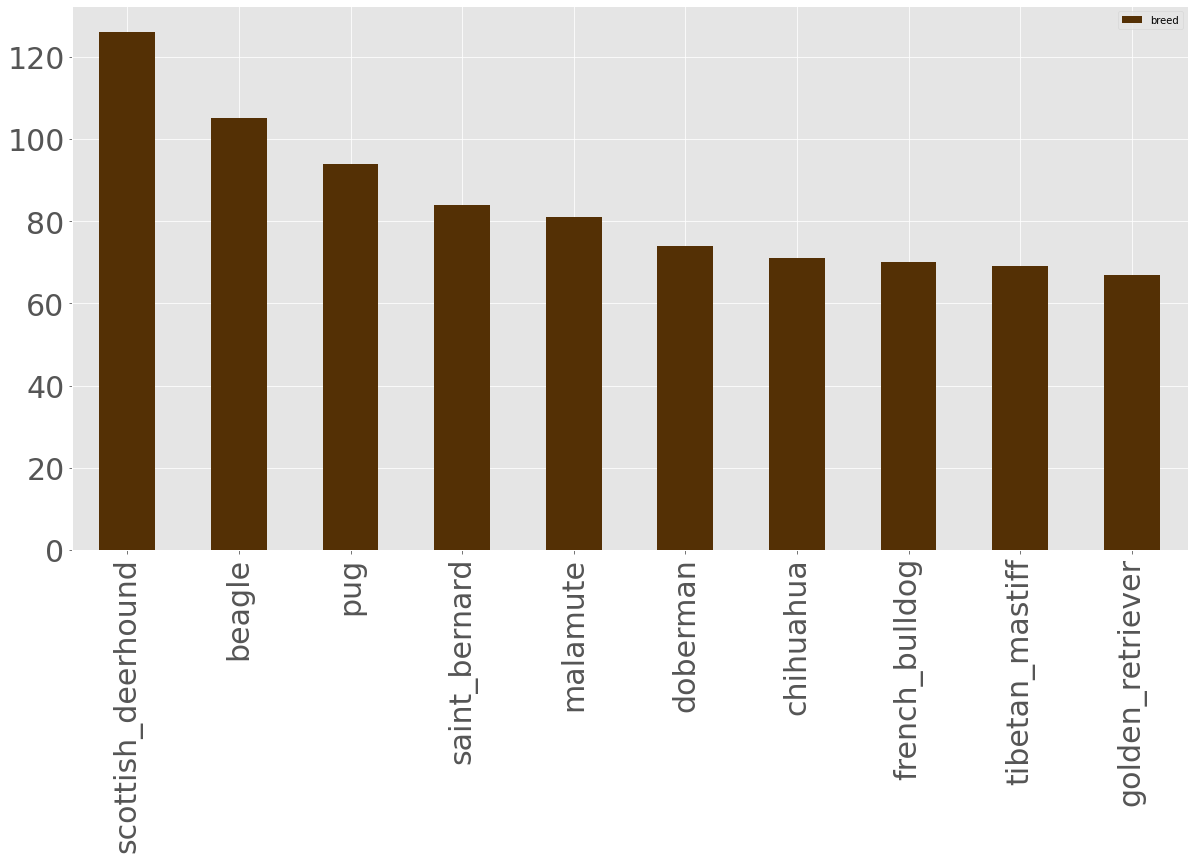

In [12]:
plt.style.use('ggplot')
new_data.breed.value_counts().plot(kind = 'bar',figsize = (20,10),fontsize = 30,legend = True, cmap = 'BrBG')
plt.show()

## Forming the directory structure to be used in tensorflow image data generator while training
<font size = 3>we can also use the flow from dataframe but i like to maintain the structure like this</font>

    DATA
    ├───train
    │   ├───beagle
    │   ├───chihuahua
    │   ├───doberman
    │   ├───french_bulldog
    │   ├───golden_retriever
    │   ├───malamute
    │   ├───pug
    │   ├───saint_bernard
    │   ├───scottish_deerhound
    │   └───tibetan_mastiff
    └───validation
        ├───beagle
        ├───chihuahua
        ├───doberman
        ├───french_bulldog
        ├───golden_retriever
        ├───malamute
        ├───pug
        ├───saint_bernard
        ├───scottish_deerhound
        └───tibetan_mastiff

In [15]:
root_train = 'Initial_data/train'
new_train =  'data/train'
new_validation = 'data/validation'

data_paths = {}
data_paths['train'] = {}
data_paths['validation'] = {}
for i in required:
    new_class_path_t = f'{new_train}/{i}'
    new_class_path_v = f'{new_validation}/{i}'
    os.mkdir(new_class_path_t)
    os.mkdir(new_class_path_v)
    data_paths['train'][i] = new_class_path_t
    data_paths['validation'][i] = new_class_path_v

In [34]:
## This is just a utility class ,will use it to print nice text on console 
 
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [44]:
print((color.DARKCYAN + 'Maintaing 80% of data for training' + color.END).center(70,' '))
print('\n')

for i in required:
    clipped_data = new_data[new_data.breed == i]
    train_images,validation_images = np.split(clipped_data, [int(0.8 * len(clipped_data))]) 
    
    for j in train_images.id:
        src = f"{root_train}/{j}.jpg"
        dest = f"{data_paths['train'][i]}/{j}.jpg"
        shutil.copy(src,dest)
    n_trian = len(os.listdir(data_paths['train'][i]))    
    print(f"{data_paths['train'][i]}".ljust(40,' '),f'contains'.ljust(10,' '),n_trian,' images')    
    
    for j in validation_images.id:
        src = f"{root_train}/{j}.jpg"
        dest = f"{data_paths['validation'][i]}/{j}.jpg"
        shutil.copy(src,dest)
    n_validation = len(os.listdir(data_paths['validation'][i]))    
    print(f"{data_paths['validation'][i]}".ljust(40,' '),f'contains'.ljust(10,' '),n_validation,' images')   
    print((color.PURPLE + '' + color.END).ljust(75,'_'))

             Maintaing 80% of data for training              


data/train/beagle                        contains   84  images
data/validation/beagle                   contains   21  images
__________________________________________________________________
data/train/chihuahua                     contains   56  images
data/validation/chihuahua                contains   15  images
__________________________________________________________________
data/train/doberman                      contains   59  images
data/validation/doberman                 contains   15  images
__________________________________________________________________
data/train/french_bulldog                contains   56  images
data/validation/french_bulldog           contains   14  images
__________________________________________________________________
data/train/golden_retriever              contains   53  images
data/validation/golden_retriever         contains   14  images
______________________________________